In [1]:
# Convolutional Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# pip install tensorflow

# Installing Keras
# pip install --upgrade keras

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import to_categorical


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128,128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

#Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a third convolution layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))

#Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding a thir convolution layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units =3, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train_dog',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/test_dog',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

classifier.fit_generator(training_set,
                         steps_per_epoch = 202,
                         epochs =5,
                         validation_data = test_set,
                         validation_steps = 44)

C:\Users\ravit\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 202 images belonging to 3 classes.
Found 185 images belonging to 3 classes.
Epoch 1/5


C:\Users\ravit\Anaconda\lib\site-packages\PIL\Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


202/202 [==============================] - 343s 2s/step - loss: 0.4670 - acc: 0.7930 - val_loss: 1.4215 - val_acc: 0.7506
Epoch 2/5
202/202 [==============================] - 324s 2s/step - loss: 0.0729 - acc: 0.9716 - val_loss: 1.2913 - val_acc: 0.7800
Epoch 3/5
202/202 [==============================] - 334s 2s/step - loss: 0.0299 - acc: 0.9900 - val_loss: 1.5577 - val_acc: 0.7552
Epoch 4/5
202/202 [==============================] - 316s 2s/step - loss: 0.0527 - acc: 0.9846 - val_loss: 1.8163 - val_acc: 0.7572
Epoch 5/5
202/202 [==============================] - 319s 2s/step - loss: 0.0103 - acc: 0.9964 - val_loss: 2.2223 - val_acc: 0.7439


In [17]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('french-bulldog.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
print(result)

[[0. 0. 1.]]


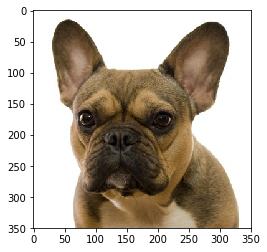

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("french-bulldog.jpg")
plt.imshow(image)
plt.show()



In [11]:
result

array([[0., 0., 1.]], dtype=float32)

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('train/*.jpg', target_size = (64, 64))
test_image = image.load_img('train/*.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(im)
training_set.class_indices






In [59]:
from PIL import Image
import glob, os
import matplotlib.pylab as plt
size=64,64
for infile in glob.glob("train/*.jpg"):
    test_image = image.load_img('train/*.jpg', target_size = (64, 64))
    test_image = image.load_img('train/*.jpg', target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(im)
    training_set.class_indices



AttributeError: 'str' object has no attribute 'ndim'

In [54]:
import numpy as np
from keras.preprocessing import image
im=im.resize(64,64)
test_image = np.expand_dims(im, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

ValueError: cannot resize an array that references or is referenced
by another array in this way.  Use the resize function

In [20]:
result


array([[1., 0., 0.]], dtype=float32)

In [57]:
result = classifier.predict(im)

ValueError: If predicting from data tensors, you should specify the `steps` argument.